In [297]:
import torchvision
from torchvision import transforms
import torchvision.transforms.functional as F
from pathlib import Path
from os import listdir
from PIL import Image
import matplotlib.pyplot as plt
import torch
import numpy as np

In [346]:
col_n = 6
row_n = 6
act = 'walkinglow'
cmap = 'bwr'

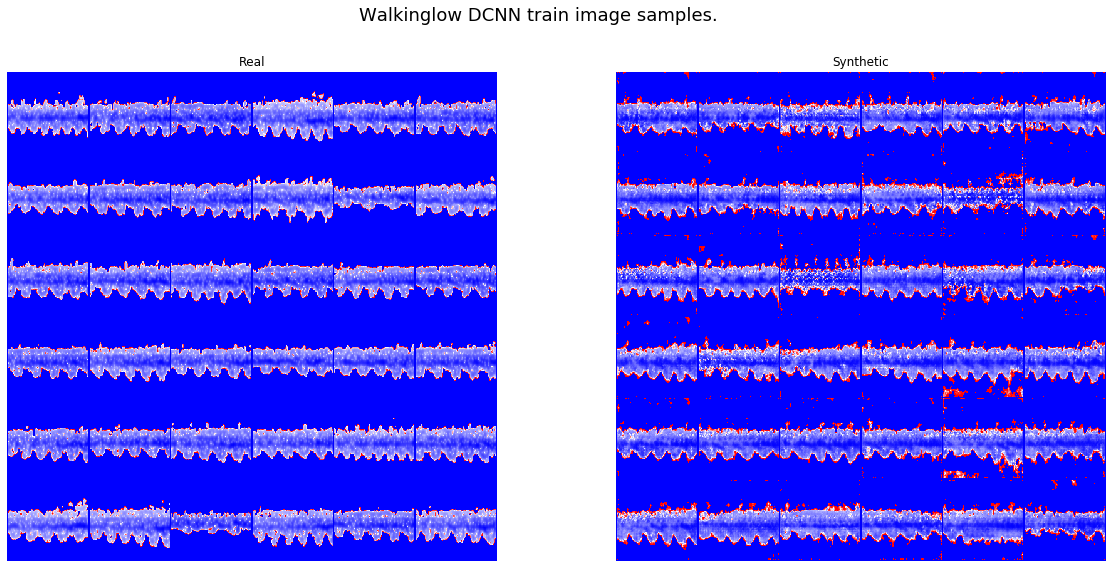

In [347]:
real_source = 'onbody-'+act+'/_'+act+'_'
fake_source = 'onbody-'+act+'-wgan'

real_source = Path('data').joinpath(real_source)
fake_source = Path('augmentation').joinpath(fake_source)

real_filenames = listdir(real_source)
fake_filenames = listdir(fake_source)

real_images = []
fake_images = []

for image_i in range(col_n * row_n):
    real_file_path = real_source.joinpath(real_filenames[image_i])
    fake_file_path = fake_source.joinpath(fake_filenames[image_i])
    
    real_image = Image.open(real_file_path).convert("L")
    fake_image = Image.open(fake_file_path).convert("L")
    
    real_images.append(np.asarray(real_image))
    fake_images.append(np.asarray(fake_image))

real_images = torch.Tensor(real_images)
fake_images = torch.Tensor(fake_images)

real_images = torch.unsqueeze(real_images, 1)
fake_images = torch.unsqueeze(fake_images, 1)

real_grid = torchvision.utils.make_grid(real_images, nrow=row_n, padding=2, normalize=False)
fake_grid = torchvision.utils.make_grid(fake_images, nrow=row_n, padding=2, normalize=False)

real_grid = F.to_grayscale(F.to_pil_image(real_grid))
fake_grid = F.to_grayscale(F.to_pil_image(fake_grid))

f, axarr = plt.subplots(1,2,figsize=(20, 9))
f.suptitle('{} DCNN train image samples.'.format(act.title()), fontsize=18)
axarr[0].imshow(np.uint8(real_grid), cmap=cmap)
axarr[1].imshow(np.uint8(fake_grid), cmap=cmap)
axarr[0].title.set_text('Real')
axarr[1].title.set_text('Synthetic')
axarr[0].axis('off')
axarr[1].axis('off')
plt.show()